In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.optimize import curve_fit
import corner
import matplotlib as mpl
%matplotlib inline

In [21]:
def set_ticklabels(ax, size=18):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(size)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(size)
        label_y.set_family('serif')

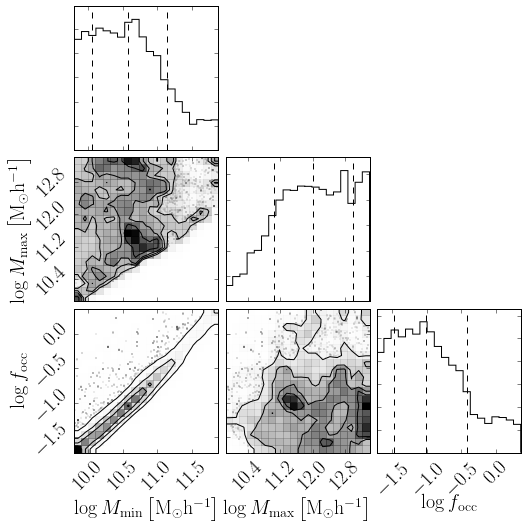

In [26]:

parspace=np.loadtxt('../output/LAEBayes_mcmc_dM_1deg_fixed.out')
parprob=np.loadtxt('../output/LAEBayes_mcmc_dM_chi_1deg_fixed.out')
parall=np.loadtxt('../output/focc_1deg_fixed.txt',skiprows=1)
wmmin=parspace[:,0]>9.8
parspace=parspace[wmmin]
parprob=parprob[wmmin]
parall=parall[wmmin]
parspace[:,1]+=parspace[:,0]

parprob=parprob/2.0
mpl.rcParams['text.usetex'] = True #Very important to force python to recognize Latex

fc=0.22
Ac=1.0/(1.0-fc)
Ac=Ac*Ac


arg_ini=200

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
mpl.rc('font', **font)

fig = corner.corner(np.transpose([parall[:,0][arg_ini:],
                                  parall[:,1][arg_ini:],
                                  (1-fc)*parall[:,2][arg_ini:]]),
                                  weight=np.exp(parprob)[ :len( parall[:,0] ) ][arg_ini:],bins=20,  
                            smooth=0.6,labels=[r"$\log M_{\rm min}\left[\rm{M_{\odot}h^{-1}}\right]$", 
                                               r"$\log M_{\rm max}\left[\rm{M_{\odot}h^{-1}}\right]$", 
                                               r"$\log f_{\rm occ}$"],quantiles=[0.16, 0.5, 0.84])
fig.savefig('../paper/fig3.pdf',bbox_inches='tight')



In [35]:
surface_density = np.loadtxt('../output/mminmax_density_1deg_fixed.txt')

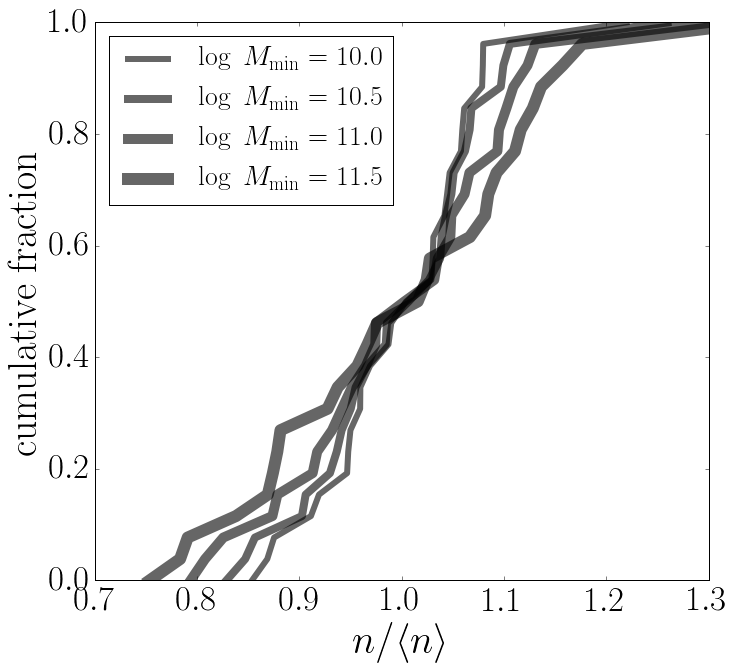

In [36]:
fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=35)

n_lines = len(surface_density)
m_min = surface_density[:,0]
m_max = surface_density[:,1]
m_min_list = list(set(m_min))

for i in range(n_lines):
    if m_min[i] in m_min_list:
        m_min_list.remove(m_min[i])
        
        m_min_tmp = surface_density[i][0]
        sort_n = np.sort(surface_density[i][2:])
        n_points = len(sort_n)
        int_n = np.linspace(0.0,1.0,n_points)
        
        
        label = r"$\log\  M_{\rm min} = %.1f$"%(m_min[i])
        plt.plot(sort_n/sort_n.mean(), int_n, lw=2.0*(6-len(m_min_list)), alpha=0.6, label=label, color='black')
        
ax.set_xlim([0.7, 1.3])
ax.set_ylim([0.0,1.0])

plt.xlabel(r'$n/\langle n\rangle$', size=40)
plt.ylabel(r'$\mathrm{cumulative\ fraction}$', size=40)
plt.legend(loc=2, prop={'size':28})
plt.savefig('../paper/fig1.pdf', bbox_inches='tight')

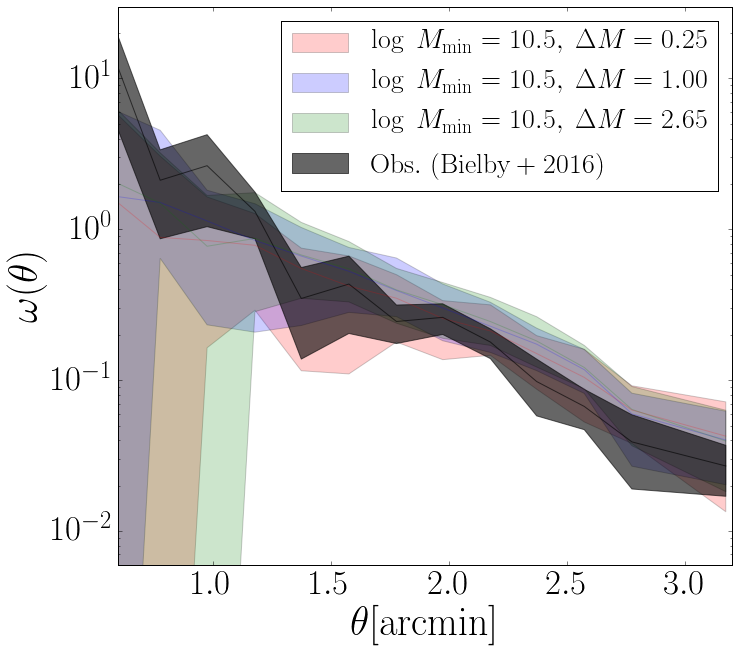

In [29]:
th,co,dco=np.genfromtxt('../data/obs/ACF/Bielby2015.txt',unpack=1)
th,c1,dcl1,dcu1=np.genfromtxt('../output/corr105_d025.txt',unpack=1)
th,c2,dcl2,dcu2=np.genfromtxt('../output/corr105_d05.txt',unpack=1)
th,c3,dcl3,dcu3=np.genfromtxt('../output/corr105_d10.txt',unpack=1)
th,c4,dcl4,dcu4=np.genfromtxt('../output/corr105_d20.txt',unpack=1)
th,c5,dcl5,dcu5=np.genfromtxt('../output/corr105_d30.txt',unpack=1)

dcl1[dcl1>=c1] = c1[dcl1>=c1]*.999999
dcl2[dcl2>=c2] = c2[dcl2>=c2]*.999999
dcl3[dcl3>=c3] = c3[dcl3>=c3]*.999999
dcl4[dcl4>=c4] = c4[dcl4>=c4]*.999999
dcl5[dcl5>=c5] = c5[dcl5>=c5]*.999999


fc=0.0
Ac=1.0/(1.0-fc)
Ac=Ac*Ac

fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=35)

#plt.errorbar(th,Ac*c1,np.array([dcl1,dcu1]),label=r'$M_{\rm min}=10.5$'+' '+r'$\Delta M=0.25$')
#plt.errorbar(th,Ac*c2,Ac*np.array([dcl2,dcu2]),label=r'$\Delta M=0.5$')
#plt.errorbar(th,Ac*c3,Ac*np.array([dcl3,dcu3]),label=r'$\Delta M=1.0$')
#plt.errorbar(th,Ac*c4,Ac*np.array([dcl4,dcu4]),label=r'$\Delta M=2.0$')
#plt.errorbar(th, Ac*c5, Ac*np.array([dcl5,dcu5]),label=r'$\Delta M=2.65$')

ax.fill_between(th, Ac*c1 - dcl1, Ac*c1 + dcu1, facecolor='red', interpolate=True, alpha=0.2)
plt.plot(th, Ac*c1, color='red', alpha=0.2)

ax.fill_between(th, Ac*c3 - dcl3, Ac*c3 + dcu3, facecolor='blue', interpolate=True, alpha=0.2)
plt.plot(th, Ac*c3, color='blue', alpha=0.2)

ax.fill_between(th, Ac*c5 - dcl5, Ac*c5 + dcu5, facecolor='green', interpolate=True, alpha=0.2)
plt.plot(th, Ac*c5, color='green', alpha=0.2)

ax.fill_between(th, co - dco, co + dco, facecolor='black', interpolate=True, alpha=0.6)
plt.plot(th, co, color='black', alpha=0.6)


p1 = plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.2)
p2 = plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.2)
p3 = plt.Rectangle((0, 0), 1, 1, fc='green', alpha=0.2)
p4 = plt.Rectangle((0, 0), 1, 1, fc='black', alpha=0.6)

label_list = [r'$\log\ M_{\rm min}=10.5 ,\ \Delta M=0.25$', 
              r'$\log\ M_{\rm min}=10.5 ,\ \Delta M=1.00$',
              r'$\log\ M_{\rm min}=10.5 ,\ \Delta M=2.65$',
              r'$\mathrm{Obs.\ (Bielby+2016)}$']
ax.legend([p1, p2, p3, p4], label_list,prop={'size':28},loc=1)

plt.xlabel(r'$\theta [\rm arcmin]$', size=40.0)
plt.ylabel(r'$\omega(\theta)$', size=40.0)
plt.xlim(0.6,3.2)
plt.ylim(0.006,30.0)

plt.yscale('log')
plt.savefig('../paper/fig5.pdf', bbox_inches='tight')

(9.5909554443611995, 11.032099028799999)


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


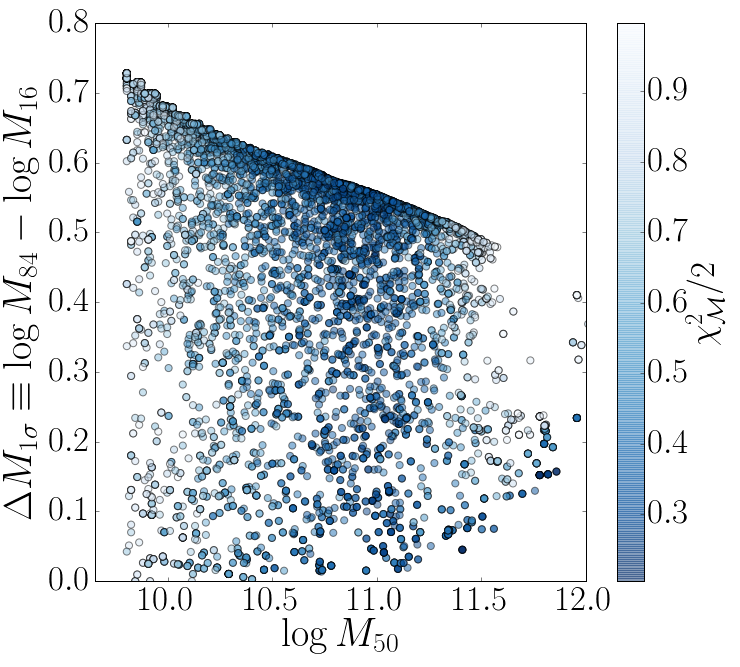

In [30]:
fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=35)

parall = np.genfromtxt('../output/focc_1deg_fixed.txt')
m_min = parall[:,0]
m_max = parall[:,1]

m16 = np.percentile(m_min,16)
m84 = np.percentile(m_min,84)
print(m16, m84)

ii = (m_min > m16) & (m_min < m84)

m_50 = parall[:,7]
m_16 = parall[:,8]
m_84 = parall[:,9]

m_2 = parall[:,10]
m_97 = parall[:,11]
log_like = -parall[:,12]

ii = (log_like < 1.0) & (m_50 > 9.8)

bielby =  [11,1.2, r"$\mathrm{Bielby+2016}$"] # m_50 ,delta_M for Bielby et al 2016.
gawiser = [10.9, 1.8, r"$\mathrm{Gawiser+2007}$"]
ouchi = [10.0, 1.6, r"$\mathrm{Ouchi+2010}$"]


figa = plt.scatter(m_50[ii], m_84[ii]-m_16[ii], c=log_like[ii], 
            cmap = cm.Blues_r,
            vmin = log_like[ii].min(),vmax = log_like[ii].max(),
            s=50.0, alpha=0.5)
#plt.scatter(bielby[0], bielby[1], s=500, label=bielby[2], marker='s',facecolors='white', edgecolors='black', lw=3)
#plt.scatter(ouchi[0], ouchi[1], s=500, label=ouchi[2], marker='>',facecolors='white', edgecolors='black',lw=3)
#plt.scatter(gawiser[0], gawiser[1], s=500, label=gawiser[2], marker='*', facecolors='white', edgecolors='black',lw=3)


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 35}
plt.rc('font', **font)
cb = fig.colorbar(figa)
cb.set_label(r'$\chi_{\mathcal{M}}^2/2$')

plt.legend(loc=2,fontsize=27, scatterpoints=1)
plt.xlim(9.65,12.0)
plt.ylim(0,0.8)
plt.xlabel(r'$\log M_{50}$', size=40.0)
plt.ylabel(r'$\Delta M_{1\sigma}\equiv\log M_{84} - \log M_{16}$', size=40.0)
plt.savefig('../paper/fig4.pdf', bbox_inches='tight')

In [31]:
m50_16 = np.percentile(m_50[ii], 16)
m50_84 = np.percentile(m_50[ii], 84)
m50_50 = np.percentile(m_50[ii], 50)
print(m50_16, m50_84, m50_50)
print(m50_84 - m50_16)

(10.082318522108039, 11.161517733138682, 10.618372388351711)
1.07919921103


In [32]:
m50_84 - m50_50, m50_50 - m50_16

(0.54314534478697141, 0.53605386624367135)

In [33]:
print 10**(10.5-0.6)/1E10
print 10**(10.5)/1E10
print 10**(10.5+0.6)/1E10

0.794328234724
3.16227766017
12.5892541179


In [34]:
delta_m = m_84[ii]-m_16[ii]
dm_16 = np.percentile(delta_m, 16)
dm_84 = np.percentile(delta_m, 84)
dm_50 = np.percentile(delta_m, 50)
print(dm_16, dm_84, dm_50)
print(dm_84 - dm_16)

(0.24040244643448921, 0.63791274492275996, 0.54115666273111529)
0.397510298488


In [11]:
print 0.66-0.55
print 0.55-0.24
print 10**dm_16
print 10**dm_84

0.11
0.31
1.76790077913
4.64278032142


In [12]:
parall = np.loadtxt('../output/focc_1deg_fixed.txt',skiprows=1)

[ 0.13867005  0.17738251] 0.0023357239569 0.00993406861135


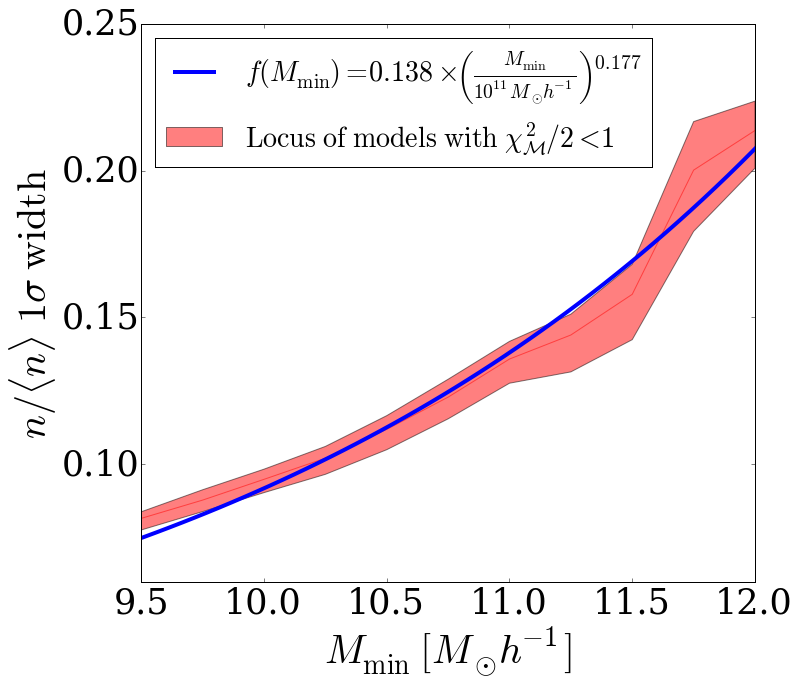

In [14]:
def func(x,a, b):
    return a * (x/1E11) ** b

log_like = -parall[:,12]
f_occ_84 = parall[:,4]
f_occ_16 = parall[:,3]
log_m_min = parall[:,0]
delta_f_occ = f_occ_84 - f_occ_16

ii = log_like < 1.0

n_bins = 11
center_log_m_min = np.linspace(9.5, 12.0, n_bins)
delta_f_occ_distro = np.zeros([n_bins,3])
delta_m = center_log_m_min[1] - center_log_m_min[0]
for i in range(n_bins):
    jj = (log_m_min < center_log_m_min[i] + 0.5 * delta_m) & (log_m_min > center_log_m_min[i] - 0.5 * delta_m)
    delta_f_occ_distro[i,:] = np.percentile(delta_f_occ[jj], [16,50,84])

fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=35)

ax.fill_between(center_log_m_min, delta_f_occ_distro[:,0], delta_f_occ_distro[:,2], facecolor='red', 
                interpolate=True, alpha=0.5)
plt.plot(center_log_m_min, delta_f_occ_distro[:,1], color='red', alpha=0.5)

popt, pcov = curve_fit(func, 10**(center_log_m_min), delta_f_occ_distro[:,1])
print popt, np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1])

x = np.linspace(8.0, 13.0, 100)
a = plt.plot(x, func(10**(x), 0.138, 0.177), lw=4, 
             label=r"$f (M_{\rm min}) = 0.138 \times \left(\frac{M_{\rm min}}{10^{11} M_{\odot} h^{-1}}\right)^{0.177}$")

plt.xlabel(r'$M_{\rm min}\ [M_{\odot} h^{-1}]$', size=40.0)
plt.ylabel(r'$n/\langle n \rangle\ 1\sigma\ \mathrm{width}$', size=40.0)
plt.xlim(9.5,12.0)
plt.ylim(0.06,0.25)


r_handle = plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5)
r_label = r'$\mathrm{Locus\ of\ models \ with}\ \chi_{\mathcal{M}}^2/2<1$'
handles, labels = ax.get_legend_handles_labels()
handles.append(r_handle)
labels.append(r_label)

ax.legend(handles, labels, prop={'size':28},loc=2)

plt.savefig('../paper/fig6.pdf', bbox_inches='tight')